In [ ]:
Insurance Claim Fraud Detection
Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

In [3]:
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.head(12)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
5,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
6,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
7,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
8,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
9,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N


In [5]:
df.tail(13)

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
986,235,39,836349,01-05-2013,IL,500/1000,2000,1453.61,4000000,619570,...,3,?,60320,9280,9280,41760,Chevrolet,Tahoe,2012,Y
987,295,46,591269,09-01-1999,IN,100/300,500,1672.88,0,478947,...,1,NO,60700,12140,6070,42490,Honda,Civic,1997,N
988,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
989,286,43,663190,05-02-1994,IL,100/300,500,1564.43,3000000,477644,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
990,257,44,109392,12-07-2006,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
991,94,26,215278,24-10-2007,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
992,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
993,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   328                       999 non-null    int64  
 1   48                        999 non-null    int64  
 2   521585                    999 non-null    int64  
 3   17-10-2014                999 non-null    object 
 4   OH                        999 non-null    object 
 5   250/500                   999 non-null    object 
 6   1000                      999 non-null    int64  
 7   1406.91                   999 non-null    float64
 8   0                         999 non-null    int64  
 9   466132                    999 non-null    int64  
 10  MALE                      999 non-null    object 
 11  MD                        999 non-null    object 
 12  craft-repair              999 non-null    object 
 13  sleeping                  999 non-null    object 
 14  husband   

In [7]:
df.shape()

TypeError: 'tuple' object is not callable

In [8]:
df.shape

(999, 39)

In [9]:
# Dataset Datatypes
df.dtypes

328                           int64
48                            int64
521585                        int64
17-10-2014                   object
OH                           object
250/500                      object
1000                          int64
1406.91                     float64
0                             int64
466132                        int64
MALE                         object
MD                           object
craft-repair                 object
sleeping                     object
husband                      object
53300                         int64
0.1                           int64
25-01-2015                   object
Single Vehicle Collision     object
Side Collision               object
Major Damage                 object
Police                       object
SC                           object
Columbus                     object
9935 4th Drive               object
5                             int64
1                             int64
YES                         

In [10]:
df.describe()

,328,48,521585,1000,1406.91,0,466132,53300,0.1,5,1,1.1,2,71610,6510,13020,52080,2004
count,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,203.829830,38.938939,546263.326326,1136.136136,1256.255495,1.102102e+06,501249.605606,25097.897898,-26820.520521,11.650651,1.839840,0.991992,1.486486,52743.073073,7434.344344,7393.943944,37914.784785,2005.104104
std,115.103809,9.140370,257190.576942,612.155989,244.243187,2.298293e+06,71728.919924,27871.869471,28105.366259,6.951671,1.019044,0.820538,1.111773,26408.011569,4883.309038,4823.859773,18890.397013,6.018773
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.500000,32.000000,335913.500000,500.000000,1089.185000,0.000000e+00,448373.000000,0.000000,-51500.000000,6.000000,1.000000,0.000000,1.000000,41775.000000,4290.000000,4440.000000,30275.000000,2000.000000
50%,199.000000,38.000000,533940.000000,1000.000000,1257.040000,0.000000e+00,466498.000000,0.000000,-24100.000000,12.000000,1.000000,1.000000,1.000000,57970.000000,6780.000000,6750.000000,42080.000000,2005.000000
75%,276.000000,44.000000,759459.500000,2000.000000,1415.710000,0.000000e+00,603254.000000,51000.000000,0.000000,17.000000,3.000000,2.000000,2.000000,70550.000000,11310.000000,10870.000000,50775.000000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000


In [ ]:
In Integer features, some of are Categorical. Lets explore all of them

In [11]:
MISSING VALUE ANALYSIS:--

SyntaxError: invalid syntax (808115652.py, line 1)

In [12]:
df.isnull().sum()

328                          0
48                           0
521585                       0
17-10-2014                   0
OH                           0
250/500                      0
1000                         0
1406.91                      0
0                            0
466132                       0
MALE                         0
MD                           0
craft-repair                 0
sleeping                     0
husband                      0
53300                        0
0.1                          0
25-01-2015                   0
Single Vehicle Collision     0
Side Collision               0
Major Damage                 0
Police                      91
SC                           0
Columbus                     0
9935 4th Drive               0
5                            0
1                            0
YES                          0
1.1                          0
2                            0
YES.1                        0
71610                        0
6510    

<Axes: >

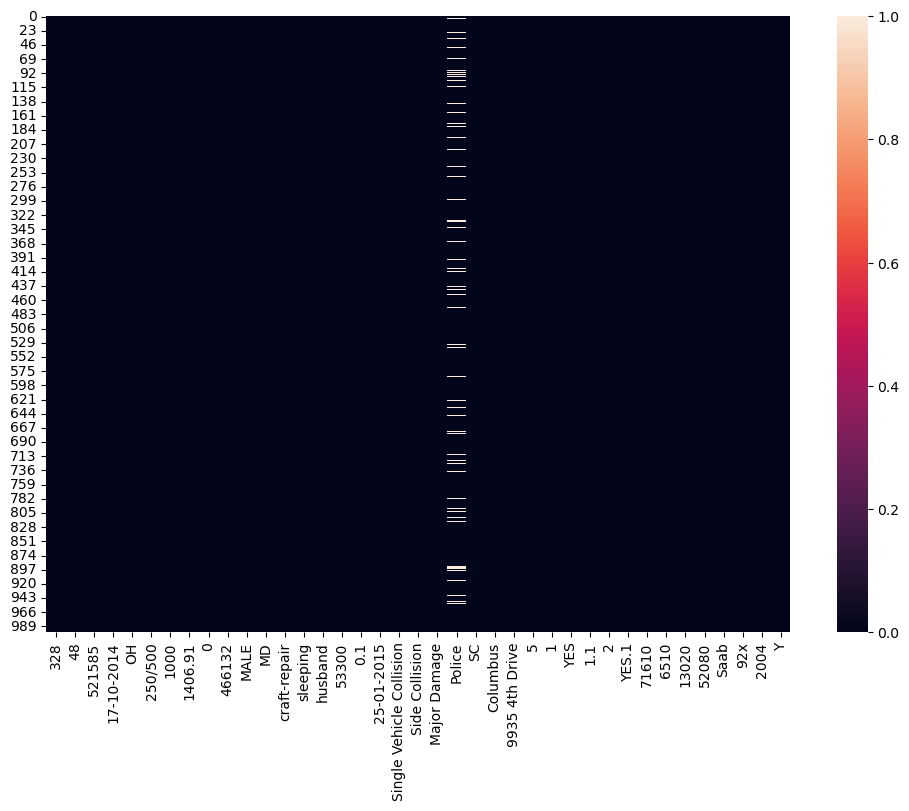

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [14]:
df.dtypes

328                           int64
48                            int64
521585                        int64
17-10-2014                   object
OH                           object
250/500                      object
1000                          int64
1406.91                     float64
0                             int64
466132                        int64
MALE                         object
MD                           object
craft-repair                 object
sleeping                     object
husband                      object
53300                         int64
0.1                           int64
25-01-2015                   object
Single Vehicle Collision     object
Side Collision               object
Major Damage                 object
Police                       object
SC                           object
Columbus                     object
9935 4th Drive               object
5                             int64
1                             int64
YES                         

In [ ]:
Exploratory Data Analysis: Univarient:---

In [ ]:
catg_features=[col for col in df.columns if df[col].dtypes=='object']
cont_features=[col for col in df.columns if df[col].dtypes!='object']

In [15]:
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

NameError: name 'catg_features' is not defined

In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')  # Load your dataset

# Identify categorical and continuous features
catg_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
cont_features = df.select_dtypes(include=['number']).columns.tolist()

# Print the number of each type of feature
print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')


Number of Categorical features: 21
Number of Continuous features: 18


([<matplotlib.patches.Wedge at 0x24ccb05c8d0>,
 [Text(-0.13259044265487685, 1.0919797500487745, 'Categorical'),
  Text(0.13259054489339886, -1.0919797376347566, 'Continuous')],
 [Text(-0.07232205962993281, 0.5956253182084223, '53.8%'),
  Text(0.07232211539639936, -0.5956253114371399, '46.2%')])

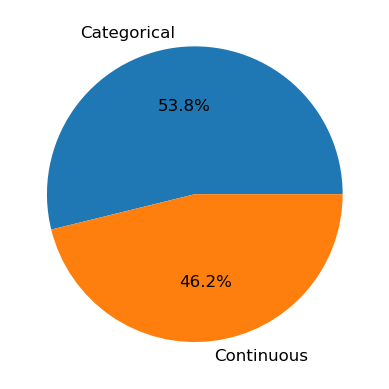

In [18]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')

In [ ]:
We have 53.8% Categorical features and 46.2% continuous features

In [19]:
df.columns

Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')

In [20]:
df['fraud_reported'].value_counts(dropna=False)

KeyError: 'fraud_reported'

In [21]:
import pandas as pd

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

# Print column names to check if 'fraud_reported' exists
print(df.columns)

# If 'fraud_reported' exists, print its value counts
if 'fraud_reported' in df.columns:
    print(df['fraud_reported'].value_counts(dropna=False))
else:
    print("Column 'fraud_reported' does not exist in the DataFrame.")


Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')
Column 'fraud_reported' does not exist in the DataFrame.


NameError: name 'target_df' is not defined

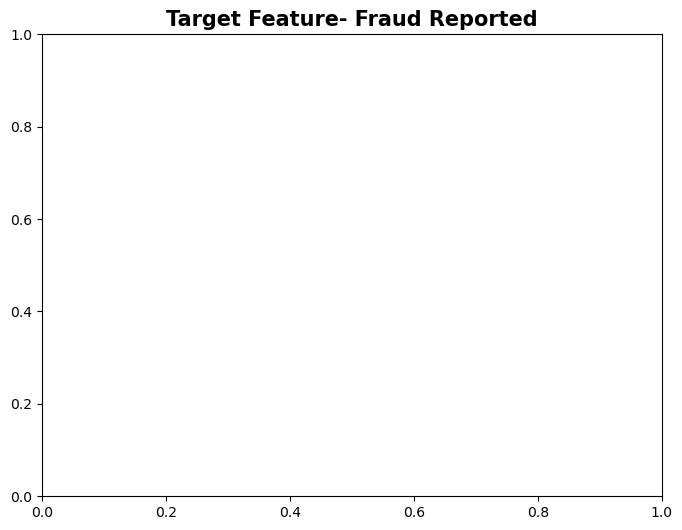

In [22]:
plt.figure(figsize=(8,6))
plt.title("Target Feature- Fraud Reported",fontdict={'fontweight':'bold','fontsize':15})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Fraud Detected')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

# Check if 'fraud_reported' exists in the DataFrame
if 'fraud_reported' in df.columns:
    # Get value counts for 'fraud_reported' and normalize to get percentages
    target_df = df['fraud_reported'].value_counts(normalize=True) * 100

    # Create the bar plot
    plt.figure(figsize=(8,6))
    plt.title("Target Feature - Fraud Reported", fontdict={'fontweight': 'bold', 'fontsize': 15})
    ax = sns.barplot(x=target_df.index, y=target_df.values)
    plt.xlabel('Fraud Detected')
    plt.ylabel('Percentage')
    plt.show()
else:
    print("Column 'fraud_reported' does not exist in the DataFrame.")


Column 'fraud_reported' does not exist in the DataFrame.


In [ ]:
Age and age vs target column

In [24]:
sns.distplot(df['age'])

KeyError: 'age'

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

# Print column names to verify 'age' exists
print(df.columns)

# If 'age' exists, plot its distribution
if 'age' in df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(df['age'], kde=True)
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'age' does not exist in the DataFrame.")


Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')
Column 'age' does not exist in the DataFrame.


In [26]:
plt.rcParams['figure.figsize'] = [15, 8]
table=pd.crosstab(df['age'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title('Age vs Fraud Reported',fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Fraud Reported',fontsize=15)


KeyError: 'age'

In [27]:
df['policy_number'].nunique()

KeyError: 'policy_number'

In [28]:
table=pd.crosstab(df['incident_type'],df['fraud_reported'])
table.div(table.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.title("Incident Type  vs Fraud detected",fontsize=15)
plt.xlabel('Incident Type',fontsize=15)
plt.ylabel('Percentage ',fontsize=15)

KeyError: 'incident_type'

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv')

# Print column names to verify 'incident_type' and 'fraud_reported' exist
print(df.columns)

# Check if both 'incident_type' and 'fraud_reported' exist in the DataFrame
if 'incident_type' in df.columns and 'fraud_reported' in df.columns:
    # Create a crosstab of 'incident_type' and 'fraud_reported'
    table = pd.crosstab(df['incident_type'], df['fraud_reported'])
    
    # Normalize the crosstab to show percentages
    table.div(table.sum(1), axis=0).plot(kind='bar', stacked=True)
    
    # Customize the plot
    plt.title("Incident Type vs Fraud Detected", fontsize=15)
    plt.xlabel('Incident Type')
    plt.ylabel('Percentage')
    plt.legend(title='Fraud Reported')
    plt.show()
else:
    missing_columns = [col for col in ['incident_type', 'fraud_reported'] if col not in df.columns]
    print(f"Column(s) {', '.join(missing_columns)} do not exist in the DataFrame.")


Index(['328', '48', '521585', '17-10-2014', 'OH', '250/500', '1000', '1406.91',
       '0', '466132', 'MALE', 'MD', 'craft-repair', 'sleeping', 'husband',
       '53300', '0.1', '25-01-2015', 'Single Vehicle Collision',
       'Side Collision', 'Major Damage', 'Police', 'SC', 'Columbus',
       '9935 4th Drive', '5', '1', 'YES', '1.1', '2', 'YES.1', '71610', '6510',
       '13020', '52080', 'Saab', '92x', '2004', 'Y'],
      dtype='object')
Column(s) incident_type, fraud_reported do not exist in the DataFrame.


In [30]:
# Target Variable:

df[['fraud_reported','Target']]

KeyError: "None of [Index(['fraud_reported', 'Target'], dtype='object')] are in the [columns]"

In [31]:
df=df.drop('incident_hour_of_the_day',axis=1)

KeyError: "['incident_hour_of_the_day'] not found in axis"

In [32]:
df

,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES.1,71610,6510,13020,52080,Saab,92x,2004,Y
0,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
1,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
2,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
3,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
4,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
995,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
996,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
997,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: '27-06-2006'

<Figure size 1200x800 with 0 Axes>